In [20]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [21]:
# Load the dataset
df = pd.read_csv('customer_data_records.csv')


In [22]:
# Display the dataset
display(df.head())

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,117,20
1,2,107,59
2,3,29,36
3,4,121,19
4,5,86,90


In [31]:
df.isnull().sum()  # Check for missing values

CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [32]:
# Extracting relevant features for clustering
X = df.iloc[:, [1, 2,]].values # Assuming columns 1 and 2 are relevant features

In [33]:
# Standardizing the features
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [34]:
# KMeans clustering
wcss = []  # List to store the within-cluster sum of squares(wcss)
# Loop to find the optimal number of clusters using the elbow method
for i in range(1, 10):  # Testing for 1 to 9 clusters
    kmeans = cluster.KMeans(n_clusters=i, random_state=42)  # Create KMeans object with i clusters
    kmeans.fit(X_scaled)  # Fit the model to the scaled data
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS) to the list

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

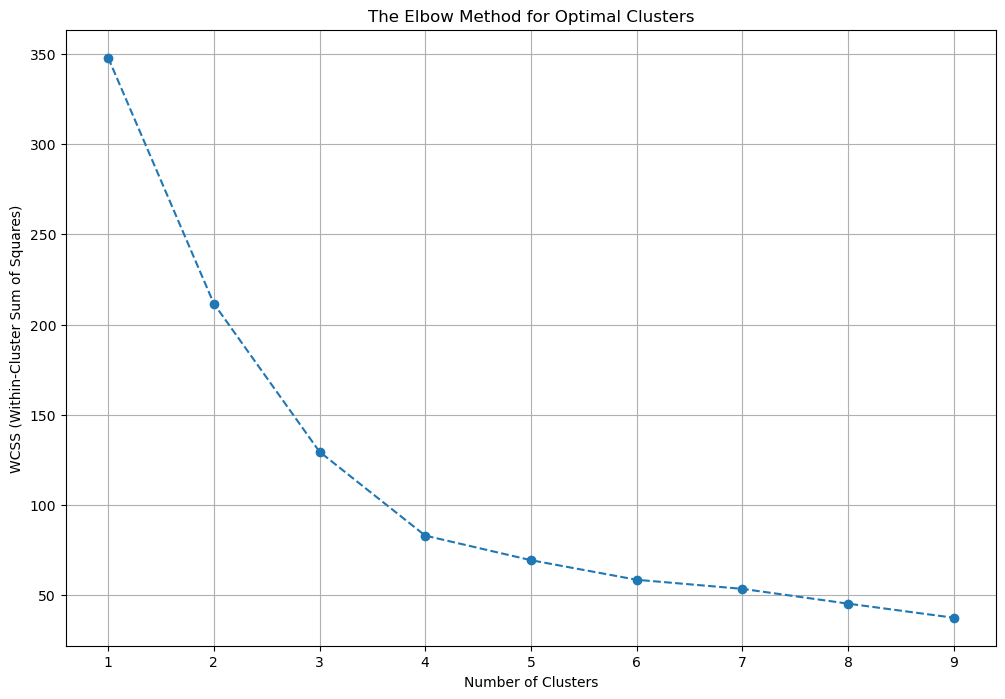

In [35]:
# Plot the Elbow method graph
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()